In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [45]:
filep = "experiments/DRAGAN_os=1_pw=3_pboth=0_psym=1_niter=100_at_2017-08-17_19:09:45.207164"
filep = "experiments/DRAGAN_os=1_pw=10_pboth=0_psym=1_niter=2000_at_2017-08-22_10:43:10.787853"

In [46]:
df = pd.DataFrame.from_csv(filep, index_col=[0, 1])

In [47]:
def get_stats(series):
    means = series.mean(level=[0])
    stds = series.std(level=[0])
    mins = series.min(level=[0])
    maxs = series.max(level=[0])
    q25 = series.groupby(level=[0]).quantile(0.25)
    q50 = series.groupby(level=[0]).quantile(0.5)
    q75 = series.groupby(level=[0]).quantile(0.75)
    
    return means, stds, (q25, q50, q75), (mins, maxs)

In [203]:
means, stds, (q25, q50, q75), (mins, maxs) = get_stats(df["errD"])

In [48]:
means, stds, (q25, q50, q75), (mins, maxs) = get_stats(df["scoreD_real"] - df["scoreD_fake"])

In [13]:
df["scoreD_real"] - df["scoreD_fake"]

iter  run
1     1     -1.350813
      2     -1.347186
      3     -1.334487
      4     -1.313327
      5     -1.337838
      6     -1.330363
      7     -1.328534
      8     -1.377785
      9     -1.349175
      10    -1.320581
      11    -1.343400
      12    -1.305275
      13    -1.340728
      14    -1.323142
      15    -1.330732
      16    -1.329082
      17    -1.356693
      18    -1.329888
      19    -1.338801
      20    -1.309838
2     1     -1.154857
      2     -1.170323
      3     -1.185028
      4     -1.151389
      5     -1.105932
      6     -1.179595
      7     -1.170651
      8     -1.137941
      9     -1.111802
      10    -1.144601
               ...   
1999  11    -0.039888
      12    -0.037356
      13    -0.026457
      14    -0.033365
      15    -0.029050
      16    -0.045254
      17    -0.062798
      18    -0.024000
      19    -0.034216
      20    -0.049484
2000  1     -0.053185
      2     -0.042169
      3     -0.030119
      4     -0.038796


In [ ]:
means

In [30]:
def plot_quantiles(q1, q2, q3, minmax=None, rng=None):
    if rng is not None:
        start, end = rng
        q1 = q1[start:end]
        q2 = q2[start:end]
        q3 = q3[start:end]
        if minmax is not None:
            minmax = (minmax[0][start:end], minmax[1][start:end])
    
    plt.figure(figsize=(15, 10))
    plt.plot(q2.index, q2, "k")
    plt.fill_between(q2.index, q1, q3, color="b", alpha=0.2)
    if minmax is not None:
        mins, maxs = minmax
        plt.plot(mins.index, mins, "g,")
        plt.plot(maxs.index, maxs, "g,")

def plot_mean_std(means, stds, minmax=None, rng=None):
    if rng is not None:
        start, end = rng
        means = means[start:end]
        stds = stds[start:end]
        if minmax is not None:
            minmax = (minmax[0][start:end], minmax[1][start:end])
    plt.figure(figsize=(15, 10))
    plt.plot(means.index, means, "k")
    plt.fill_between(stds.index, means-2*stds, means+2*stds, color='b', alpha=0.2)
    if minmax is not None:
        mins, maxs = minmax
        plt.plot(mins.index, mins, "g,")
        plt.plot(maxs.index, maxs, "g,")

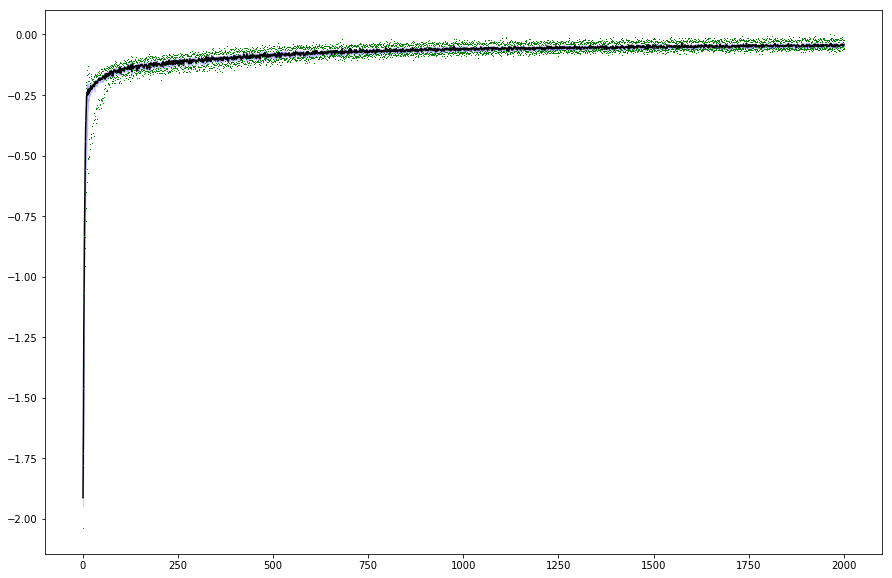

In [49]:
plot_quantiles(q25, q50, q75, minmax=(mins, maxs), rng=(0,2000))

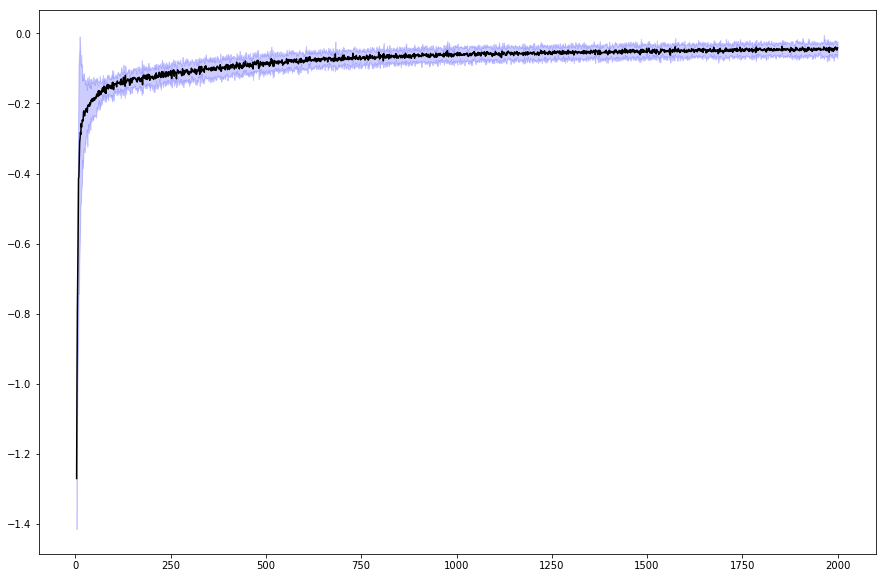

In [54]:
plot_mean_std(means, stds, rng=(2,2000))